In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as st
import pandas as pd
import numpy as np

/Users/laneskij/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('/Users/laneskij/Documents/University/Tesi/Project/dataset.csv')

In [3]:
#X = np.array(data)
X = []
M = np.array(data)[:,0:360]
X.append(M[:,0:60])
X.append(M[:,60:120])
X.append(M[:,120:180])
X.append(M[:,180:240])
X.append(M[:,240:300])
X.append(M[:,300:360])



In [4]:
print len(M), len(M[0]), len(X), len(X[0]), len(X[0][0])

1000 360 6 1000 60


In [5]:
#Fitting ARIMA(p,d,q)
#with d=0 we have a ARMA(p,q)
#method can be 'css', 'mle-css' and 'mle'

parameters = []
models = []
for item in X[3]:
    model = sm.tsa.ARIMA(item, order=(2,1,0)).fit(method = 'css')
    parameters.append(model.params.tolist())
    models.append(model)

#See other parameters, I don't have any idea how to check the model with them! 
#print model.bic, model.aic, model.hqic
#print sm.stats.durbin_watson(data)
#print model.resid


/Users/laneskij/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


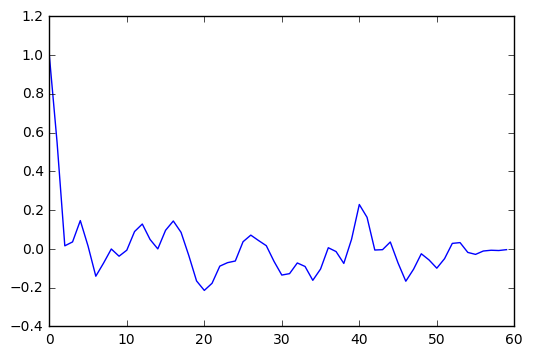

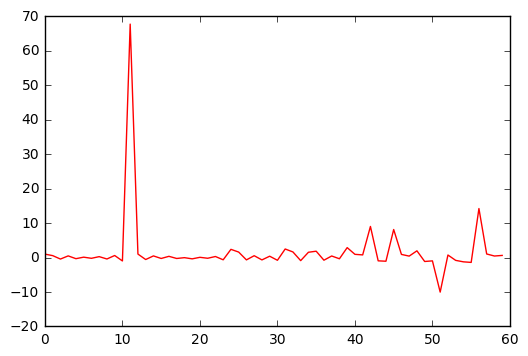

In [7]:
#try to observe the autocorrelation and partial autocorrelation functions for any point
#There is a 3-step rule which determines the p and q by this observation, see reference below
#https://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf
datapoint = X[3][0]
#autocorrelation
acValues = st.stattools.acf(datapoint, unbiased=False, nlags=60, qstat=False, fft=False, alpha=None)
#partialautocorrelation
pacValues = st.stattools.pacf(datapoint, nlags=60, method='ywunbiased', alpha=None)

plt.plot(acValues, 'b-', label='ac')
plt.show()
plt.plot(pacValues, 'r-', label='pac')
plt.show()

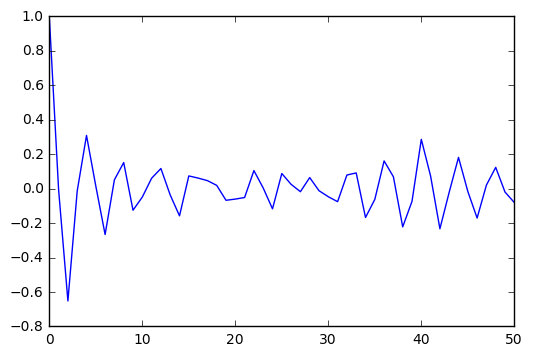

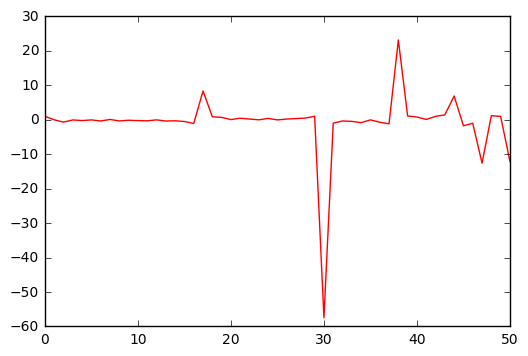

In [12]:
#The acf and pacf for all fitted values
acValues = st.stattools.acf(models[0].fittedvalues, unbiased=False, nlags=50, qstat=False, fft=False, alpha=None)
pacValues = st.stattools.pacf(models[0].fittedvalues, nlags=50, method='ywunbiased', alpha=None)

plt.plot(acValues, 'b-', label='ac')
plt.show()
plt.plot(pacValues, 'r-', label='pac')
plt.show()


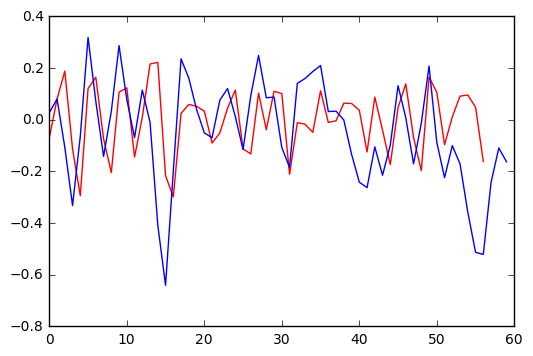

In [6]:
#Check a datapoint values with respect to its fittedvalues
#fittedvalues

datapoint = X[3][0]
plt.plot(models[0].fittedvalues, 'r-', label='data')
#real values
plt.plot(datapoint, 'b-', label='fit')
#plt.plot(models[1].resid, 'g-', label='pac')
plt.show()


In [13]:
import csv
with open('M3' + '.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerows(parameters)

In [3]:
X =(np.array(data)[:,:-1]).astype(np.float32)
Y = (np.array(data)[:,-1])
label_dic = {target:value for value, target in enumerate(sorted(set(Y.tolist())))}
Y = [label_dic[y] for y in Y]